Geographic Subsetting of GRIB2 Messages
=======================================

In [1]:
import grib2io
import wat
import numpy as np
import pyproj
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 

ERROR 1: PROJ: proj_create_from_database: Open of /home/tim/anaconda3/envs/default311/share/proj failed


Global Forecast System Weather Model
------------------------------------

In [10]:
msgs = grib2io.open("../tests/data/gfs.jpeg.grib2")
proj_pars = msgs[0].projParameters
gfs_proj = ccrs.PlateCarree(globe=ccrs.Globe(semimajor_axis=proj_pars["a"], semiminor_axis=proj_pars["b"]))
levels = [4800, 4950, 5100, 5250, 5400, 5550, 5700, 5850, 6000]

In [3]:
print(msgs[0])

0:d=2022-02-10 00:00:00:HGT:Geopotential Height (gpm):500 mb:1 day, 0:00:00


Included with the installation of Cartopy, whenever the ```projection``` keyword is used with Matplotlib, for example, ```fig.add_subplot(projection=...)``` a Cartopy GeoAxes is created rather than a Matplotlib Axes.  A Cartopy GeoAxes includes lots of features to plot maps.

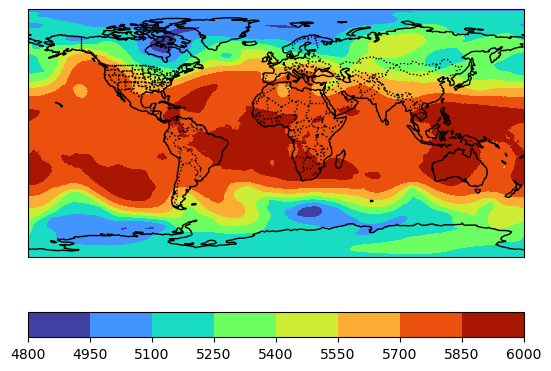

In [11]:
lats, lons = msgs[0].latlons()
fig = plt.figure()
ax = fig.add_subplot(projection=gfs_proj)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')
cntr = plt.contourf(lons, lats, msgs[0].data, cmap='turbo', levels=levels)
fig.colorbar(cntr, location="bottom")

Subset to the extent of the Continental United States
-----------------------------------------------------

The ```lats``` and ```lons``` can be given in any order and can have any number of values.  The minimum and maximum of each are used to define the bounds.  The ```lons``` start at 0 and increase positive eastward, so something like 125 W longitude would be entered as (360-125).

In [12]:
subset = msgs[0].subset(lats=(24.5, 49.4), lons=(360-125, 360-66))

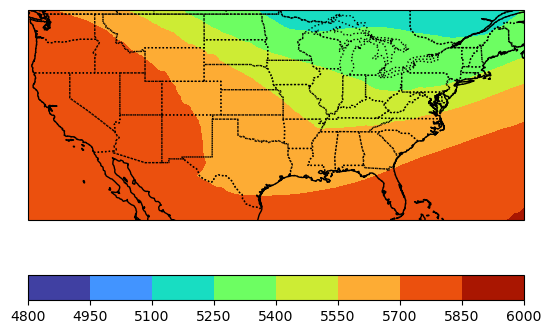

In [13]:
lats, lons = subset.latlons()
fig = plt.figure()
ax = fig.add_subplot(projection=gfs_proj)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')
cntr = plt.contourf(lons, lats, subset.data, cmap='turbo', levels=levels)
fig.colorbar(cntr, location="bottom")

Geographic Subsetting of Xarray DataArray and Datasets
======================================================

In [14]:
import xarray as xr
ds = xr.open_mfdataset(["../tests/data/gfs.jpeg.grib2"], engine="grib2io")

Subset to the extent of the State of Maine, United States
---------------------------------------------------------

In [15]:
xrsubset = ds["HGT"].grib2io.subset(lats=(43.083, 47.433), lons=(360-71.25, 360-66.95))

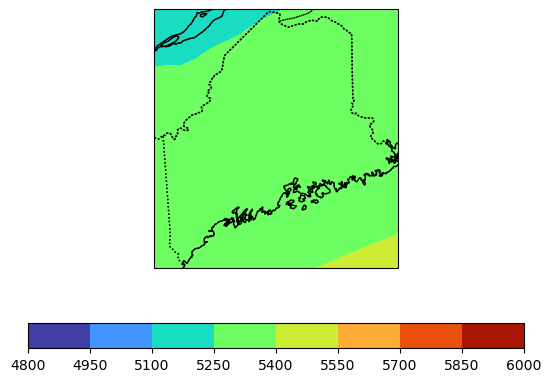

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection=gfs_proj)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')
cntr = plt.contourf(xrsubset.longitude, xrsubset.latitude, xrsubset.values, cmap='turbo', levels=levels)
fig.colorbar(cntr, location="bottom")